# Péndulo Doble 

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from double_pendulum_system import System

In [3]:
def load_data(file_path="data/data.dat"):
    """Carga los datos desde el archivo .dat"""
    data = np.loadtxt(file_path, skiprows=1)
    t, theta1, omega1, theta2, omega2, E_kin, E_pot, E_total = data.T
    return t, theta1, omega1, theta2, omega2, E_kin, E_pot, E_total

In [17]:
# Plotting functions

def compute_cartesian_coords(theta1, theta2, L1, L2):
    """Convierte coordenadas angulares a cartesianas"""
    x1 = L1 * np.sin(theta1)
    y1 = -L1 * np.cos(theta1)
    
    x2 = x1 + L2 * np.sin(theta2)
    y2 = y1 - L2 * np.cos(theta2)
    
    return x1, y1, x2, y2

def plot_trajectories(theta1, theta2, L1=1, L2=1):
    """Grafica las trayectorias de ambas masas en el espacio cartesiano."""
    x1, y1, x2, y2 = compute_cartesian_coords(theta1, theta2, L1, L2)

    plt.figure(figsize=(8, 6))
    
    plt.plot(x1, y1, label="Masa 1 (Extremo superior)", color="b")
    plt.plot(x2, y2, label="Masa 2 (Extremo inferior)", color="r")
    
    plt.xlabel("X (m)")
    plt.ylabel("Y (m)")
    plt.title("Trayectorias de las masas")
    plt.legend()
    plt.grid()
    plt.axis("equal")  # Para que las escalas sean proporcionales
    
    plt.show()


def plot_positions(t, theta1, theta2):
    """Grafica las posiciones de las masas en un subplot 2x1."""
    fig, axs = plt.subplots(2, 1, figsize=(8, 6), sharex=True)
    
    axs[0].plot(t, theta1, label=r"$\theta_1$", color="b")
    axs[0].set_ylabel(r"$\theta_1$ (rad)")
    axs[0].legend()
    
    axs[1].plot(t, theta2, label=r"$\theta_2$", color="r")
    axs[1].set_ylabel(r"$\theta_2$ (rad)")
    axs[1].set_xlabel("Tiempo (s)")
    axs[1].legend()
    
    plt.suptitle("Posición angular de las masas")
    plt.show()

def plot_theta1_vs_theta2(theta1, theta2):
    """Grafica theta_1 vs theta_2."""
    plt.figure(figsize=(6, 6))
    plt.plot(theta1, theta2, color="purple")
    plt.xlabel(r"$\theta_1$ (rad)")
    plt.ylabel(r"$\theta_2$ (rad)")
    plt.title(r"$\theta_1$ vs $\theta_2$")
    plt.grid()
    plt.show()

def plot_phase_space(t, theta1, omega1, theta2, omega2):
    """Grafica los espacios fase en subplots 2x1."""
    fig, axs = plt.subplots(2, 1, figsize=(8, 6), sharex=True)
    
    axs[0].plot(theta1, omega1, label=r"$\theta_1$ vs $\omega_1$", color="blue")
    axs[0].set_ylabel(r"$\omega_1$ (rad/s)")
    axs[0].legend()
    
    axs[1].plot(theta2, omega2, label=r"$\theta_2$ vs $\omega_2$", color="red")
    axs[1].set_ylabel(r"$\omega_2$ (rad/s)")
    axs[1].set_xlabel(r"$\theta$ (rad)")
    axs[1].legend()
    
    plt.suptitle("Espacio fase de cada masa")
    plt.show()

def plot_energy(t, E_kin, E_pot, E_total):
    """Grafica la energía cinética y potencial en un subplot 2x1."""
    fig, axs = plt.subplots(2, 1, figsize=(8, 6), sharex=True)
    
    axs[0].plot(t, E_kin, label="Energía Cinética", color="green")
    axs[0].plot(t, E_pot, label="Energía Potencial", color="orange", linestyle="--")
    axs[0].set_ylabel("Energía (J)")
    axs[0].legend()
    
    axs[1].plot(t, E_total, label="Energía Total", color="black")
    axs[1].set_ylabel("Energía (J)")
    axs[1].set_xlabel("Tiempo (s)")
    axs[1].legend()
    
    plt.suptitle("Energía del sistema")
    plt.show()


In [ ]:
# Simulation parameters
m1, l1, theta1_init, omega1 = 1.0, 1.0, np.pi / 2, 0.0
m2, l2, theta2_init, omega2 = 1.0, 1.0, np.pi / 2, 0.0
dt = 0.01
t_max = 10.0

In [ ]:
system = System(m1, l1, theta1_init, omega1, m2, l2, theta2_init, omega2)
system.simulate(t_max, dt)

In [10]:
t, theta1, omega1, theta2, omega2, E_kin, E_pot, E_total = load_data()

ValueError: x and y must have same first dimension, but have shapes (1000,) and (1,)

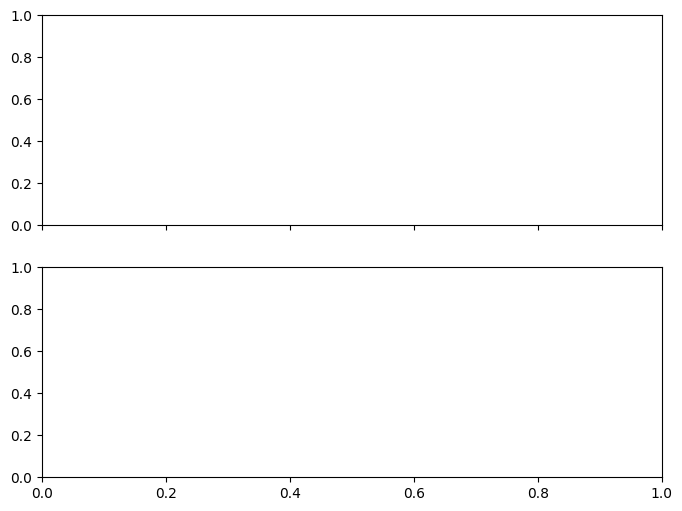

In [22]:
#plot_trajectories(theta1, theta2, l1, l2)
plot_positions(t, theta1, theta2)
plot_theta1_vs_theta2(theta1, theta2)
plot_phase_space(t, theta1, omega1, theta2, omega2)
plot_energy(t, E_kin, E_pot, E_total)